# PyTorch Logistic Regression


* [Acknowledgements](#ackw)
* [Overview](#overview) 
* [PyTorch logistic regression](#ekf)

* [References](#refs)

## <a name="ackw"></a> Acknowledgements

The Python code for this notebook is edited for the course <a href="https://courses.edx.org/courses/course-v1:IBM+DL0110EN+3T2018/course/"> Deep Learning with Python and PyTorch</a> on <a href="https://www.edx.org/">edX</a>.

## <a name="overview"></a> Overview

In this notebook, we will construct a <a href="https://en.wikipedia.org/wiki/Linear_regression">logistic regression</a> model using PyTorch. 

## <a name="ekf"></a> PyTorch logistic regression

In [1]:
# Import the libraries we need for this lab
import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits import mplot3d
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn

In [2]:
import sys

if "../../code" not in sys.path:
    sys.path.append("../../code")

In [3]:
from surface_error_plotter import ErrorSurfacesPlotter

In [4]:
# Set random seed so we have reproducible
# results
torch.manual_seed(0)

In [5]:
# Create the data class

class Data(Dataset):
    
    # Constructor
    def __init__(self):
        self.x = torch.arange(-1, 1, 0.1).view(-1, 1)
        self.y = torch.zeros(self.x.shape[0], 1)
        self.y[self.x[:, 0] > 0.2] = 1
        self.len = self.x.shape[0]
        
    # Getter
    def __getitem__(self, index):      
        return self.x[index], self.y[index]
    
    # Get items
    def __len__(self):
        return self.len

In [6]:
# Create Data object
data_set = Data()

In [7]:
# Create logistic_regression class

class LogisticRegression(nn.Module):
    
    # Construstor
    def __init__(self,n_inputs):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(n_inputs, 1)
        
    # Prediction    
    def forward(self, x):
        yhat = torch.sigmoid(self.linear(x))
        return yhat

In [8]:
# Create model object and print parameter
model = LogisticRegression(1)
print("The parameters: ", model.state_dict())

The parameters:  OrderedDict([('linear.weight', tensor([[-0.0075]])), ('linear.bias', tensor([0.5364]))])


In [9]:
# Create DataLoader, Cost Function, Optimizer
trainloader = DataLoader(dataset=data_set, batch_size=3)
criterion_rms = nn.MSELoss()
learning_rate = 2
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

<Figure size 432x288 with 0 Axes>

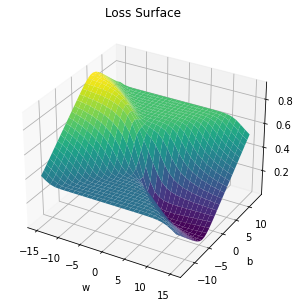

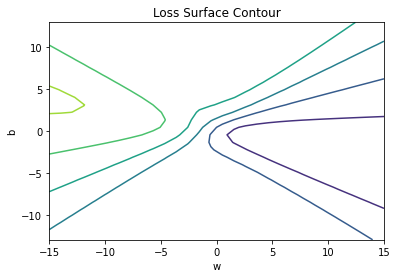

In [10]:
plotter = ErrorSurfacesPlotter(15, 13, data_set[:][0], data_set[:][1], 30)

In [11]:
# Train the model

def train_model(epochs):
    
    for epoch in range(epochs):  
        for x, y in trainloader:
            
            yhat = model(x)
            loss = criterion_rms(yhat, y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            plotter.set_para_loss(model, loss.tolist())
        if epoch % 20 == 0:
            plotter.plot_ps()


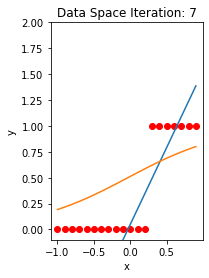

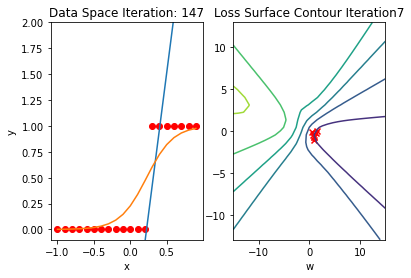

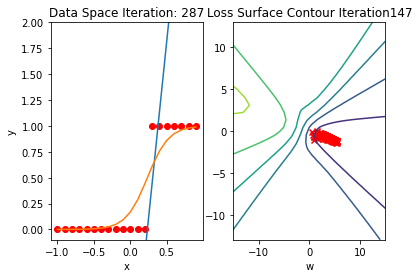

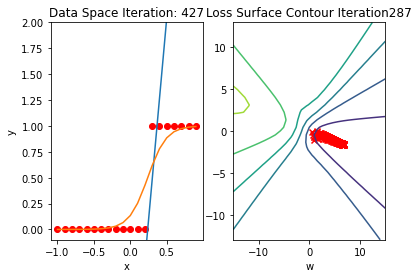

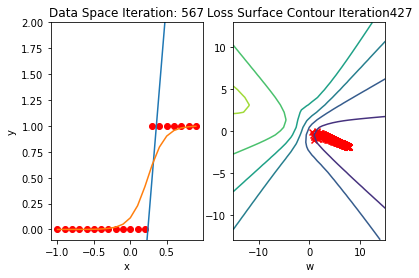

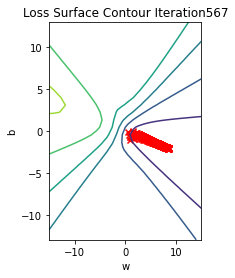

In [12]:
train_model(100)

In [13]:
# Make the Prediction
yhat = model(data_set.x)
label = yhat > 0.5
print("The accuracy: ", torch.mean((label == data_set.y.type(torch.ByteTensor)).type(torch.float)))

The accuracy:  tensor(1.)
